<a href="https://colab.research.google.com/github/aabioumaima/Image-classification-using-CNN/blob/main/CIFAR_10_CNN_Code2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import libraries

In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

### Reading the CIFAR-10 datasets from keras datasets and setting train and test

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


### EDA(Exploratory Data Analysis)

In [3]:
# Checking the number of rows (records) and columns (features)
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse',
               'ship', 'truck']

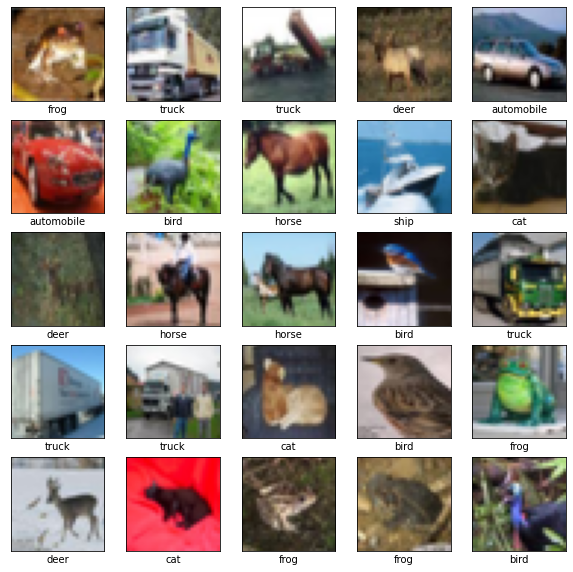

In [5]:
# Visualizing some of the image from the training dataset
plt.figure(figsize = [10, 10])
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])

## Data Preprocessing

. The reason for Standardizing/Normalizing is to convert all pixel values to values between 0 and 1.

. The reason for converting type to float is that to_categorical (one hot encoding) needs the data to be of type float by default.

. The reason for using to_categorical is that the loss function that we will be using in this code (categorical_crossentropy) when compiling the model needs data to be one hot encoded.

In [6]:
# Converting the pixels data to float type
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

#Standarizing (255 is the total number of pixel an image can have)
train_images = train_images / 255
test_images = test_images / 255

#One hot encoding the target class (labels)
num_classes = 10
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

## Building the CNN Model using Keras

### Setting up the layers

In [7]:
#Creating a sequntial model and adding layers to it

model = Sequential()

model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size = (2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size = (2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding = 'same', activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size = (2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

### Compiling the Model
. Optimizer used during Back Propagation for weight and bias adjustment - Adam (adjusts the learning rate adaptively).

. Loss Function used - Categorical Crossentropy (used when multiple categories/classes are present).

. Metrics used for evaluation - Accuracy.

In [8]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, 
              metrics = ['accuracy'])

### Fitting the Model
. Batch Size is used for Adam optimizer.

. Epochs - One epoch is one complete cycle (forward pass + backward pass).

In [9]:
history = model.fit(train_images, train_labels, batch_size = 64, epochs = 5,
                   validation_data = (test_images, test_labels))

Epoch 1/5
782/782 [==============================] - 395s 503ms/step - loss: 1.7117 - accuracy: 0.4080 - val_loss: 1.1856 - val_accuracy: 0.5644
Epoch 2/5
782/782 [==============================] - 392s 501ms/step - loss: 1.1616 - accuracy: 0.5874 - val_loss: 1.3735 - val_accuracy: 0.5464
Epoch 3/5
782/782 [==============================] - 389s 498ms/step - loss: 0.9832 - accuracy: 0.6533 - val_loss: 0.9493 - val_accuracy: 0.6647
Epoch 4/5
782/782 [==============================] - 388s 496ms/step - loss: 0.8728 - accuracy: 0.6942 - val_loss: 0.7500 - val_accuracy: 0.7338
Epoch 5/5
782/782 [==============================] - 388s 496ms/step - loss: 0.8069 - accuracy: 0.7186 - val_loss: 0.7093 - val_accuracy: 0.7535


### Visualization the Evaluation

. Loss Curve - Comparing the Training Loss with the Testing Loss over increasing Epochs.

. Accuracy Curve - Comparing the Training Accuracy with the Testing Accuracy over increasing Epochs.

Text(0.5, 1.0, 'Loss Curves')

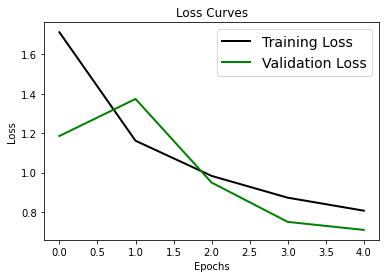

In [10]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

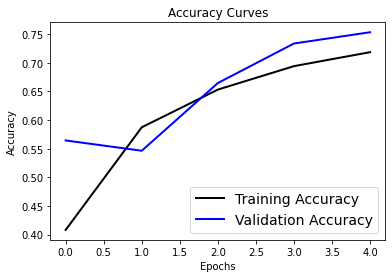

In [11]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

### Predicting the Result
Here is the fun part. Let's take 25 images from the testing data and see
how many of it we predicted correctly.

In [12]:
# Making the Predictions
pred = model.predict(test_images)
print(pred)

# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

[[4.7612630e-04 9.5011041e-05 2.2314219e-03 ... 1.6175846e-04
  6.3027599e-04 2.0256943e-04]
 [2.6418857e-04 1.8679611e-03 3.5117770e-07 ... 6.4542355e-08
  9.9715281e-01 7.1366911e-04]
 [2.0497588e-03 1.0897410e-02 9.8215014e-06 ... 5.8830269e-06
  9.8045129e-01 6.5429276e-03]
 ...
 [1.2720005e-05 1.1925937e-06 3.9892485e-03 ... 3.7275366e-03
  2.7255091e-06 1.6777672e-06]
 [1.1749588e-01 6.6228497e-01 1.8931564e-03 ... 1.4593054e-02
  1.8748984e-02 1.1806477e-02]
 [7.2869952e-06 1.6034473e-05 8.0216189e-05 ... 9.8971063e-01
  1.0359310e-05 1.1242898e-05]]
[3 8 8 ... 5 1 7]


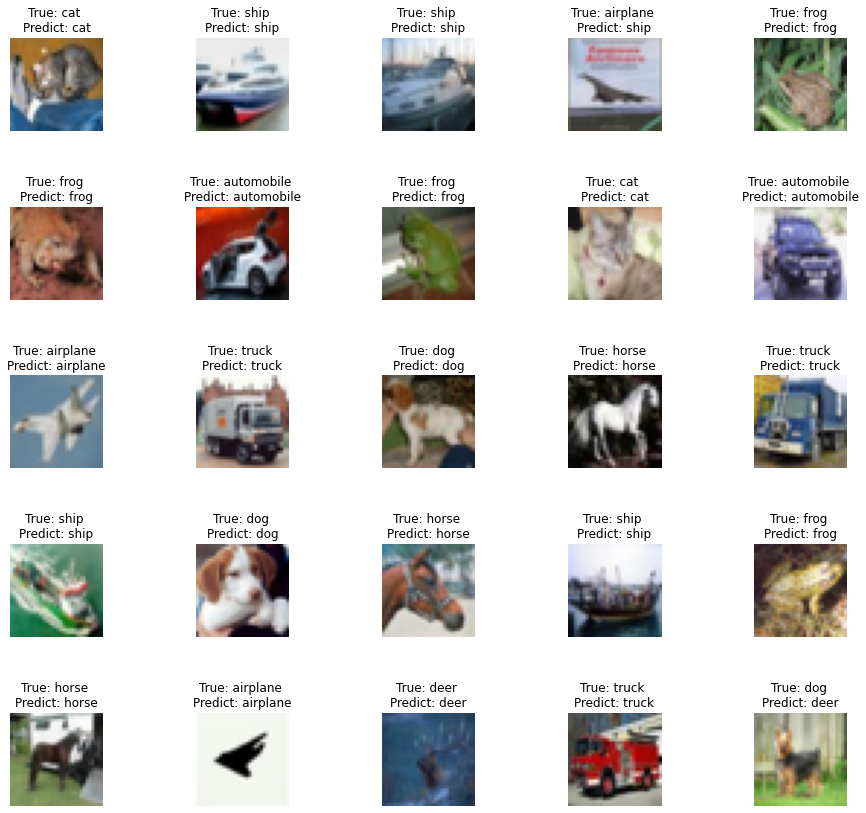

In [13]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)